***CONFIDENCE INTERVAL SAMPLE***

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


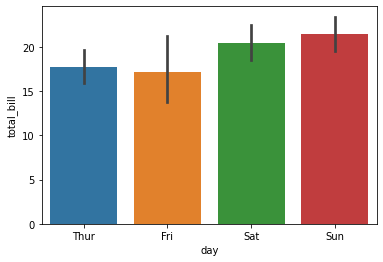

In [9]:
# barplot of day and total bills with confidecne interval 95
sns.barplot(x = "day", y = "total_bill", data = tips, ci = 95)
plt.show;

In [10]:
# looking only at sundays
tipsSun = tips[tips["day"] =="Sun"]
tipsSun.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [11]:
# mean and std for sundays
tipsSun["total_bill"].mean()

21.410000000000004

In [12]:
tipsSun["total_bill"].std()

8.832121828869889

In [19]:
# standard error of mean
sem = tipsSun["total_bill"].std()/np.sqrt(len(tipsSun))
sem

1.0131138555021968

In [23]:
# calculating margin of error for 95% 
z = stats.norm.ppf(0.975)
z

1.959963984540054

In [24]:
moe = z * sem
moe

1.9856666690228222

In [26]:
# CI upper limit value

ci_upper = tipsSun["total_bill"].mean() + moe
ci_upper

23.395666669022827

In [27]:
# CI lower limit value
ci_lower = tipsSun["total_bill"].mean() - moe
ci_lower

19.42433333097718

In [28]:
# finding upper and lower with scipy library

stats.norm.interval(0.95, loc = tipsSun["total_bill"].mean(), scale = sem)

(19.42433333097718, 23.395666669022827)